In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("rplidar_data_ceiling.csv", delimiter=",")
data

,index,time,data
0,0,1597991043186237115,1906
1,1,1597991043192058271,1896
2,2,1597991043201587957,1896
3,3,1597991043210232873,1893
4,4,1597991043219828027,1906
...,...,...,...
19250,20098,1597991223128934067,1894
19251,20099,1597991223172792432,1894
19252,20100,1597991223172977299,1894
19253,20101,1597991223173088228,1894


In [5]:
print(data["data"])

0        1906
1        1896
2        1896
3        1893
4        1906
         ... 
19250    1894
19251    1894
19252    1894
19253    1894
19254    1896
Name: data, Length: 19255, dtype: int64


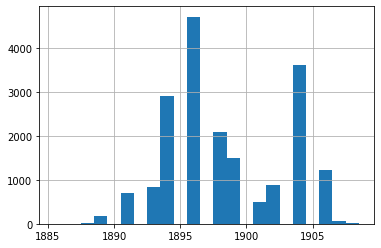

In [6]:
data["data"].hist(bins=max(data["data"])-min(data["data"]), align='left')
plt.show()

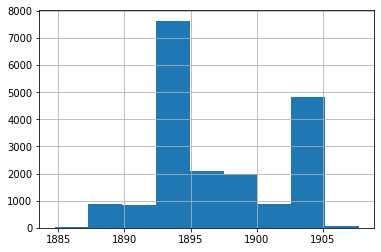

In [7]:
data["data"].hist(bins=9, align='left')
plt.show()